### Notebook Avaliable at https://github.com/Stephen-Robbins/Math-of-Finance/blob/main/Deep_Hedging.ipynb

### Diffusion Processes

A Diffusion process incorporates randomness into its structure, through Brownian motion, $W_t$. The general form of an SDE is:

$$ dX_t = \mu(X_t, t) dt + \sigma(X_t, t) dW_t $$

- $\mu(X_t, t)$: The drift term.
- $\sigma(X_t, t)$: The diffusion term.
- $W_t$:  Brownian motion.

### Brownian motion ($W_t$) Properties:

1. $W_0 = 0$.
2. $W_t$ has independent increments.
3. $W_t - W_s \sim \mathcal{N}(0, t-s)$ for $t > s$.
4. $W_t$ is almost surely continuous.

### Example: Geometric Brownian Motion (GBM)

GBM is an SDE used to model stock prices, given by:

$$ dS_t = \mu S_t dt + \sigma S_t dW_t $$

- $S_t$: Stock price at time $t$.
- $\mu$: Expected return rate.
- $\sigma$: Volatility (standard deviation of returns).

Attempting to solve the SDE for Geometric Brownian Motion (GBM) naively:

$$ \frac{dS_t}{S_t} = \mu dt + \sigma dW_t $$

We divide by $S_t$ and integrate both sides from 0 to $T$:

$$ \int_0^T \frac{dS_t}{S_t} = \mu \int_0^T dt + \sigma \int_0^T dW_t $$

This leads to:

$$ \ln\left(\frac{S_T}{S_0}\right) = \mu T + \sigma W_T $$

Solving for $S_T$ gives:

$$ S_T = S_0 e^{\mu T + \sigma W_T} $$

### Critical Mistake:

We assumed $d\ln\left(S_t\right)=\frac{dS_t}{S_t}$, i.e the normal chain rule can apply to stochastic calculus, but this is wrong!


### Ito's lemma (A Stochastic Chain Rule)

Consider an Itô process $X_t$ governed by:

$$ dX_t = \mu(X_t, t) dt + \sigma(X_t, t) dW_t$$

where $B_t$ is a Wiener process. Consider a function $f(x, t)$, the differntial Taylor series expansion is:

$$ df = \frac{\partial f}{\partial t} dt + \frac{1}{2} \frac{\partial^2 f}{\partial t^2} dt^2 + \cdots + \frac{\partial f}{\partial x} dx + \frac{1}{2} \frac{\partial^2 f}{\partial x^2} dx^2 + \cdots $$

Substituting $X_t$ for $x$ and $\mu(X_t, t) dt + \sigma(X_t, t) dW_t$ for $dx$, we get:

$$ df = \frac{\partial f}{\partial t} dt + \frac{\partial f}{\partial x} (\mu(X_t, t) dt + \sigma(X_t, t) dW_t) + \frac{1}{2} \frac{\partial^2 f}{\partial x^2} (\mu^2(X_t, t) dt^2 + 2\mu(X_t, t) \sigma(X_t, t) dt dW_t +\sigma^2(X_t, t) dW_t^2) + \cdots $$

As $dt \rightarrow 0$, terms involving $dt^2$ and $dt dW_t$ vanish faster than those involving $dW_t^2$, which scales as $O(dt)$.The equation simplifies to:

$$ df = \left( \frac{\partial f}{\partial t} + \mu(X_t, t) \frac{\partial f}{\partial x} + \frac{\sigma^2(X_t, t)}{2} \frac{\partial^2 f}{\partial x^2} \right) dt + \sigma(X_t, t) \frac{\partial f}{\partial x} dW_t $$


### Stochastic vs. Deterministic Chain Rule

For a deterministic function $X_t$, applying the chain rule to a twice-differentiable function $f(t, x)$ yields:

$$ df = \frac{\partial f}{\partial t} dt + \frac{\partial f}{\partial x} \frac{dX_t}{dt} dt $$

Given a deterministic process $dX_t = \mu(X_t, t) dt +\sigma(X_t, t) dt$, the differential $df$ for $f(t, X_t)$ is:

$$ df = \left( \frac{\partial f}{\partial t} + \mu(X_t, t) \frac{\partial f}{\partial x} \right) dt +\sigma(X_t, t)\frac{\partial f}{\partial x} dt $$


### Stochastic Case with Itô's Lemma

For a stochastic process $X_t$ governed by $dX_t = \mu(X_t, t) dt + \sigma_t dW_t$, Itô's lemma provides the differential $df$:

$$ df = \left( \frac{\partial f}{\partial t} + \mu(X_t, t) \frac{\partial f}{\partial x} + \frac{\sigma^2(X_t, t)}{2} \frac{\partial^2 f}{\partial x^2} \right) dt + \sigma(X_t, t) \frac{\partial f}{\partial x} dW_t $$

### Contrast and Interpretation

- **Additional Term**: The term $\frac{\sigma^2(X_t, t)}{2} \frac{\partial^2 f}{\partial x^2} dt$ in the stochastic case arises from the quadratic variation of the Wiener process, $dW_t^2 = dt$, a property nonexistent in deterministic calculus.

### Correct Solution for GBM using Itô's Lemma

Consider the Geometric Brownian Motion (GBM) described by the SDE:

$$ dS_t = \mu S_t dt + \sigma S_t dW_t $$

Here, $\mu$ represents the constant drift rate, and $\sigma$ represents the constant volatility. The term $S_t$ signifies the stock price at time $t$.

To apply Itô's Lemma, we select a function $f(t, S_t)$ to transform the SDE. Choosing $f(t, S_t) = \ln(S_t)$, we proceed as follows:

#### Step 1: Compute Partial Derivatives of $f$

For $f(t, S_t) = \ln(S_t)$:

- $\frac{\partial f}{\partial t} = 0$ since $f$ does not explicitly depend on $t$.
- $\frac{\partial f}{\partial S_t} = \frac{1}{S_t}$
- $\frac{\partial^2 f}{\partial S_t^2} = -\frac{1}{S_t^2}$

#### Step 2: Apply Itô's Lemma to $f(t, S_t)$

Itô's Lemma gives:

$$ df = \left( \frac{\partial f}{\partial t} + \mu(S_t, t) \frac{\partial f}{\partial S_t} + \frac{ \sigma^2(S_t, t)}{2} \frac{\partial^2 f}{\partial S_t^2} \right) dt +  \sigma(S_t, t) \frac{\partial f}{\partial S_t} dW_t $$

- Note: In this context, $\mu(S_t, t) = \mu S_t$ and $ \sigma(S_t, t) = \sigma S_t$, reflecting the GBM dynamics.

Substituting the derivatives and terms:

$$ d(\ln(S_t)) = \left( 0 + \mu S_t \cdot \frac{1}{S_t} - \frac{(\sigma S_t)^2}{2} \cdot \frac{1}{S_t^2} \right) dt + \sigma S_t \cdot \frac{1}{S_t} dW_t $$

Simplifying, we get:

$$ d(\ln(S_t)) = \left( \mu - \frac{\sigma^2}{2} \right) dt + \sigma dW_t $$

#### Step 3: Integrate and Solve for $S_T$

Integrating from $0$ to $T$:

$$ \ln\left(\frac{S_T}{S_0}\right) = \left( \mu - \frac{\sigma^2}{2} \right) T + \sigma W_T $$

Solving for $S_T$:

$$ S_T = S_0 e^{\left( \mu - \frac{\sigma^2}{2} \right) T + \sigma W_T} $$



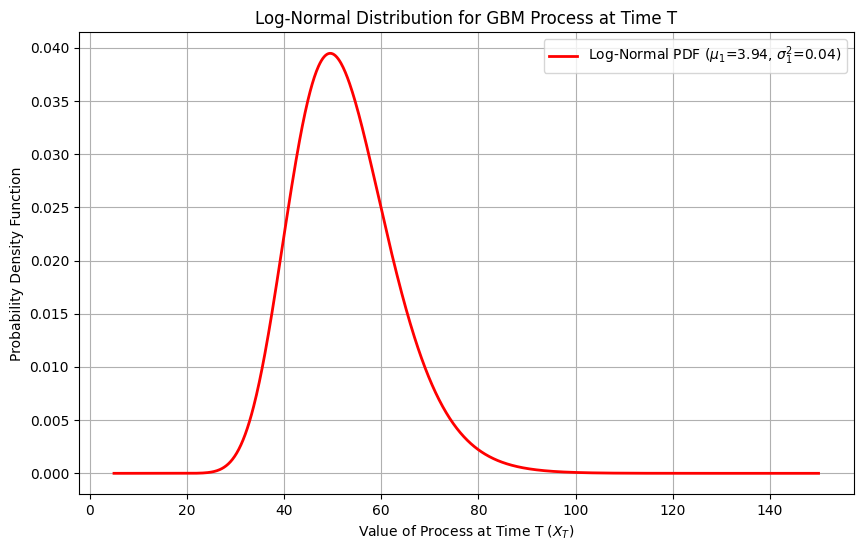

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

def plot_gbm_log_normal_distribution(X_t, mu, sigma, T_minus_t):
    """
    Plot the log-normal distribution for a GBM process at time T.

    Parameters:
    X_t (float): The value of the process at time t.
    mu (float): Drift coefficient of the GBM process.
    sigma (float): Volatility coefficient of the GBM process.
    T_minus_t (float): Time difference between T and t.
    """
   
    # Calculate the parameters of the log-normal distribution
    mu_1 = np.log(X_t) + (mu - 0.5 * sigma**2) * T_minus_t
    sigma_1 = sigma * np.sqrt(T_minus_t)

    # Generate values for the x-axis
    x = np.linspace(X_t * 0.1, X_t * 3, 1000)  

    # Calculate the log-normal distribution
    pdf = (1 / (x * sigma_1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((np.log(x) - mu_1) / sigma_1) ** 2)

    # Plot the log-normal distribution
    plt.figure(figsize=(10, 6))
    plt.plot(x, pdf, 'r-', lw=2, label=f'Log-Normal PDF ($\mu_1$={mu_1:.2f}, $\sigma_1^2$={sigma_1**2:.2f})')
    plt.title('Log-Normal Distribution for GBM Process at Time T')
    plt.xlabel('Value of Process at Time T ($X_T$)')
    plt.ylabel('Probability Density Function')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define the parameters of the GBM process
X_t = 50  
mu = .05  
sigma = .2  
T_minus_t = 1  

plot_gbm_log_normal_distribution(X_t, mu, sigma, T_minus_t)

### Black Scholes PDE Derivation outline :

1. **Portfolio Construction:**
   Construct a portfolio $\Pi$ consisting of one short option (put or call) and $\Delta$ units of the underlying asset:

   $$ \Pi = -V + \frac{dV}{dS} S $$

   where $V(S_t, t)$ is the option value, and $S$ is the asset price.

2. **Portfolio Dynamics:**
   The change in portfolio value over an infinitesimally small time $dt$ is:

   $$ d\Pi = -dV + \frac{dV}{dS} dS $$

3. **Option Price Dynamics:**
   By Ito's lemma, we have

   $$ dV = \left( \frac{\partial V}{\partial t} + \mu(S_t, t) \frac{\partial V}{\partial S} + \frac{\sigma^2(S_t, t)}{2} \frac{\partial^2 V}{\partial S^2} \right) dt + \sigma(S_t, t) \frac{\partial V}{\partial S} dW_t $$

4. **Asset Price Dynamics:**
   We assume underlying asset follows geometric Brownian motion:

   $$ dS = \mu S dt + \sigma S dW_t $$

   i.e. $\mu(S_t, t)=\mu S$ and $\sigma(S_t, t)=\sigma S$

5. **Substituting and Simplifying:**
   Substitute $dV$  into $d\Pi$ and $\mu S dt + \sigma S dW_t$ for $dS$ leading to:

  $$
  d\Pi = -\left(\left( \frac{\partial V}{\partial t} + \mu S \frac{\partial V}{\partial S} + \frac{(\sigma S)^2}{2} \frac{\partial^2 V}{\partial S^2} \right) dt + \sigma S \frac{\partial V}{\partial S} dW_t \right) + \frac{dV}{dS} (\mu S dt + \sigma S dW_t).
  $$
  
  Simplifying we get:

$$ d\Pi = \left( -\frac{\partial V}{\partial t}  - \frac{(\sigma S)^2}{2} \frac{\partial^2 V}{\partial S^2} \right) dt$$
   

6. **Risk Free Assumption**
Since all risk has vanished from our equation we assume
$$d\Pi =r\Pi  dt =r \left( -V + \frac{dV}{dS} S \right) dt$$
where $r$ is the risk free rate. 

7. **Putting it all Together**
We have thus: 
$$r \left( -V + \frac{dV}{dS} S \right) dt=\left( -\frac{\partial V}{\partial t}  - \frac{(\sigma S)^2}{2} \frac{\partial^2 V}{\partial S^2} \right) dt$$
and after simplifying, we get the Black Scholes PDE:
$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0
$$


### Black-Scholes Formula for a European Call and Put Option

The price of a European call option $C$ is given by:

$$ c(t) = S(t) \cdot N(d_1) - e^{-r(T-t)} K\cdot N(d_2) $$


Similarly, the price of a European put option $p(t)$ is given by:

$$ p(t) = e^{-r(T-t)} K \cdot N(-d_2) - S(t) \cdot N(-d_1) $$


where:

- $S(t)$: Stock price at time $t$
- $K$: Strike price of the option
- $T$: Time to expiration
- $r$: Risk-free interest rate
- $N(x)$: Cumulative distribution function of the standard normal distribution
- $d_1$ and $d_2$ are calculated as:

$$ d_1 = \frac{\ln(S(t) / K) + (r + \sigma^2 / 2)(T-t)}{\sigma \sqrt{T-t}} $$
$$ d_2 = d_1 - \sigma \sqrt{T-t} $$

- $\sigma$: Volatility (Standard Deviation) of the stock's returns


In [ ]:
from scipy.stats import norm
import numpy as np

def black_scholes_call(S0, X, T, r, sigma):
    """
    Calculate the Black-Scholes option price for a European call option.

    Parameters:
    S0 (float): Current stock price
    X (float): Strike price of the option
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the stock 

    Returns:
    float: Price of the call option
    """
    # Calculate d1 and d2
    d1 = (np.log(S0 / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    # Calculate the call option price
    call_price = (S0 * norm.cdf(d1)) - (X * np.exp(-r * T) * norm.cdf(d2))
    return call_price

def black_scholes_put(S0, X, T, r, sigma):
    """
    Calculate the Black-Scholes option price for a European put option.

    Parameters:
    S0 (float): Current stock price
    X (float): Strike price of the option
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the stock 

    Returns:
    float: Price of the put option
    """
    # Calculate d1 and d2
    d1 = (np.log(S0 / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    # Calculate the call option price
    put_price = -(S0 * norm.cdf(-d1)) + (X * np.exp(-r * T) * norm.cdf(-d2))
    return put_price

# Given data
S0 = 50    # Current stock price
X = 50       # Strike price
T = 0.5      # Time to expiration in years
r = 0.01   # Risk-free interest rate 
sigma = 0.10 # Volatility of the stock 

# Calculate the call option price
call_option_price = black_scholes_call(S0, X, T, r, sigma)
put_option_price = black_scholes_put(S0, X, T, r, sigma)
call_option_price, put_option_price

In [25]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def plot_option_price(K=100, T=1, r=0.05, sigma=0.2):
    S = np.linspace(50, 150, 100)  # Stock price range
    prices = black_scholes_call(S, K, T, r, sigma)
    
    # Payoff at time T for a call option
    payoff = np.maximum(S - K, 0)

    plt.figure(figsize=(10, 6))
    
    # Plotting the Black-Scholes Call Option Price
    plt.plot(S, prices, label='Call Option Price')
    
    # Plotting the Payoff at time T
    plt.plot(S, payoff, label='Payoff at T', linestyle='--', color='red')
    
    plt.xlabel('Stock Price')
    plt.ylabel('Value')
    plt.title('Black-Scholes Call Option Price and Payoff at T')
    plt.legend()
    plt.grid(True)
    
    # Fixing the x and y axes
    plt.xlim([50, 150])
    plt.ylim([0,60])
    
    plt.show()

interact(plot_option_price, K=(50,150,5), T=(0.01,2,0.01), r=(0,0.1,0.01), sigma=(0.01,1,0.01))


interactive(children=(IntSlider(value=100, description='K', max=150, min=50, step=5), FloatSlider(value=1.0, d…

<function __main__.plot_option_price(K=100, T=1, r=0.05, sigma=0.2)>

### Introduction to the Greeks

The Greeks measure the sensitivity of option prices to various factors. 

#### Delta ($\Delta=\frac{\partial V}{\partial S}$)
- Measures the rate of change of the option price with respect to changes in the underlying asset's price.
- For call options: $\Delta = N(d_1)$
- For put options: $\Delta = N(d_1) - 1$

#### Gamma ($\Gamma=\frac{\partial^2 V}{\partial S^2}$)
- Measures the rate of change in Delta with respect to changes in the underlying asset's price.
- $\Gamma = \frac{N'(d_1)}{S \sigma \sqrt{T-t}}$

#### Theta ($\Theta=-\frac{\partial V}{\partial \tau} $) $(\tau:=T-t)$
- Measures the rate of change of the option price with respect to time (time decay).
- Call options: $\Theta = -\frac{S N'(d_1) \sigma}{2 \sqrt{T-t}} - r X e^{-r(T-t)} N(d_2)$
- Put options: $\Theta = -\frac{S N'(d_1) \sigma}{2 \sqrt{T-t}} + r X e^{-r(T-t)} N(-d_2)$

#### Vega ($\nu=\frac{\partial V}{\partial \sigma}$)
- Measures the rate of change of the option price with respect to volatility of the underlying asset.
- $\nu = S \sqrt{T-t} N'(d_1)$

#### Rho ($\rho=\frac{\partial V}{\partial r}$)
- Measures the rate of change of the option price with respect to the risk-free interest rate.
- For call options: $\rho = (T-t) X e^{-r(T-t)} N(d_2)$
- For put options: $\rho = -(T-t) X e^{-r(T-t)} N(-d_2)$


In [ ]:
from scipy.stats import norm
import numpy as np

def european_call_price_and_greeks(S, X, T, r, sigma):
    """
    Calculate the price and Greeks for a European call option.

    Parameters:
    S (float): Current stock price
    X (float): Strike price
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the stock

    Returns:
    tuple: Option price, Delta, Gamma, Theta, Vega, Rho
    """
    # Calculate d1 and d2
    d1 = (np.log(S / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Calculate the price of the call option
    price = S * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)

    # Calculate Greeks
    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    theta = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * X * np.exp(-r * T) * norm.cdf(d2)
    vega = S * np.sqrt(T) * norm.pdf(d1)
    rho = T * X * np.exp(-r * T) * norm.cdf(d2)

    return price, delta, gamma, theta, vega, rho

# Example usage
S0 = 100  # Current stock price
X = 100   # Strike price
T = 1    # Time to expiration (1 year)
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility of the stock

price, delta, gamma, theta, vega, rho = european_call_price_and_greeks(S0, X, T, r, sigma)
print(f"Call Price: {price:.2f}, Delta: {delta:.2f}, Gamma: {gamma:.2f}, Theta: {theta:.2f}, Vega: {vega:.2f}, Rho: {rho:.2f}")


### Self-Financing-Replicating Portfolio with Delta 

This Python code simulates a self-financing delta hedging strategy for a European call option on a stock, demonstrating how to maintain a delta-neutral portfolio through continuous rebalancing. The strategy involves short selling a call option, buying $\Delta$ shares of the underlying stock to hedge, and investing the remaining funds in a risk-free bank account. 


- **Initial Setup**: The portfolio starts with an amount equal to the call option's price. The option is shorted, the corresponding $\Delta$ shares of stock are purchased, and any remaining funds are placed in a risk-free bank account.
- **Delta ($\Delta$)**: Represents the hedge ratio, indicating the number of stock shares needed to hedge against the price movement of one option contract. Calculated using the Black-Scholes model.
- **Rebalancing**: At each time step, the stock position is adjusted to the new $\Delta$, ensuring the portfolio remains delta-neutral. The adjustment is financed by the change in the option's value, keeping the strategy self-financing.




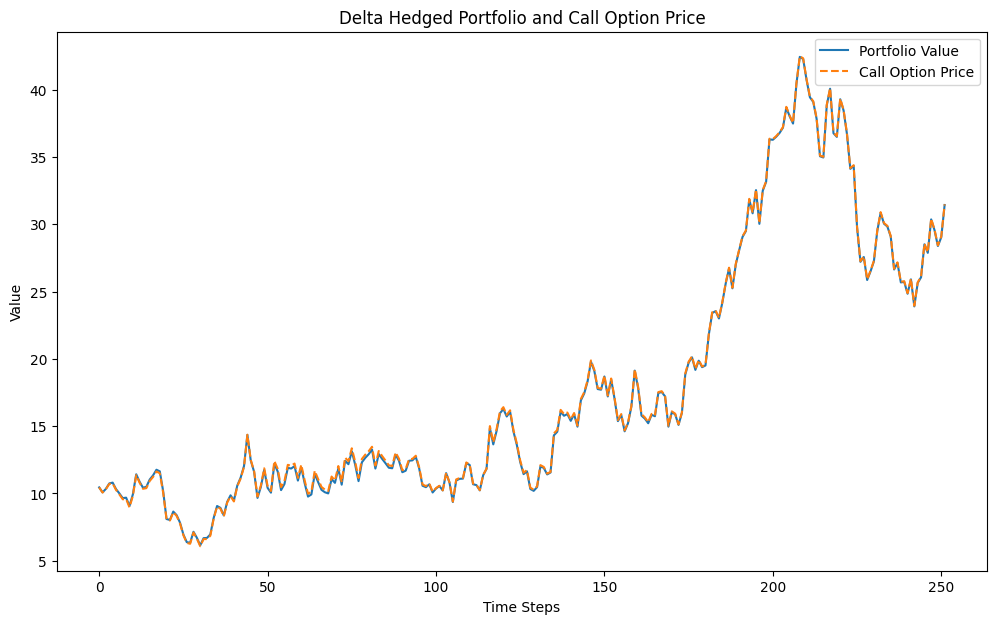

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = np.where(T <= 0, np.maximum(S-K, 0), S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    return call_price

def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    delta = np.where(T <= 0, 1.0 * (S > K), norm.cdf(d1))
    return delta

# Parameters
S0, K, T, r, sigma, mu = 100, 100, 1, 0.05, 0.2, .3
dt, N = 1/252, int(T / (1/252))

# Simulate stock path
stock_price_changes = (mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.randn(N-1)
S = S0 * np.exp(np.cumsum(np.insert(stock_price_changes, 0, 0)))

# Time to maturity for each step
T_remaining = T - np.arange(N) * dt

# Calculate option prices and delta
call_prices = black_scholes_call(S, K, T_remaining, r, sigma)
D = delta_call(S, K, T_remaining, r, sigma)

# Calculate stock investment based on delta
stock_investment = D * S

# Initialize bank investment and portfolio value arrays
bank_investment = np.zeros(N)
Pi = np.zeros(N)

# Initial bank investment and portfolio value
bank_investment[0] = call_prices[0] - stock_investment[0]
Pi[0] = bank_investment[0] + stock_investment[0] - call_prices[0]

# Update bank investment and portfolio value for each step
for t in range(1, N):
    bank_investment[t] = bank_investment[t-1] * np.exp(r * dt) - (stock_investment[t] -D[t-1]*S[t])

# Calculate portfolio value
Pi = bank_investment  + stock_investment# - call_prices

# Plot results
plt.figure(figsize=(12, 7))
plt.plot(Pi, label='Portfolio Value')
plt.plot(call_prices, label='Call Option Price', linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Delta Hedged Portfolio and Call Option Price')
plt.legend()
plt.show()

### Delta-Gamma Hedging Strategy Overview

This code implements a Delta-Gamma hedging strategy for a European call option using simulated stock prices.
We conduct our delta gamma hedge for the call option using the underlying stock and an option expiring 1 additonal year  in the future.

#### Hedge Components:
- **Option Pricing**: Black-Scholes model for call prices, Delta ($\Delta$), and Gamma ($\Gamma$).
- **Portfolio**: $\Pi = -V + A \cdot S + B \cdot \text{Option}$

#### Mathematical Setup:
1. **Delta Neutrality**: $\frac{d\Pi}{dS} = 0 \Rightarrow A = \Delta - B \cdot \Delta_{\text{option}}$
2. **Gamma Neutrality**: $\frac{d^2\Pi}{dS^2} = 0 \Rightarrow B = \frac{\Gamma}{\Gamma_{\text{option}}}$

#### Execution:
- Simulate $S$ using geometric Brownian motion.
- Calculate $\Delta$, $\Gamma$ for the portfolio and auxiliary option.
- Solve for $A$ and $B$ to maintain neutrality.
- Update portfolio value: $\Pi$.

#### Result:
- Plots portfolio value ($\Pi$) and call option price over time.


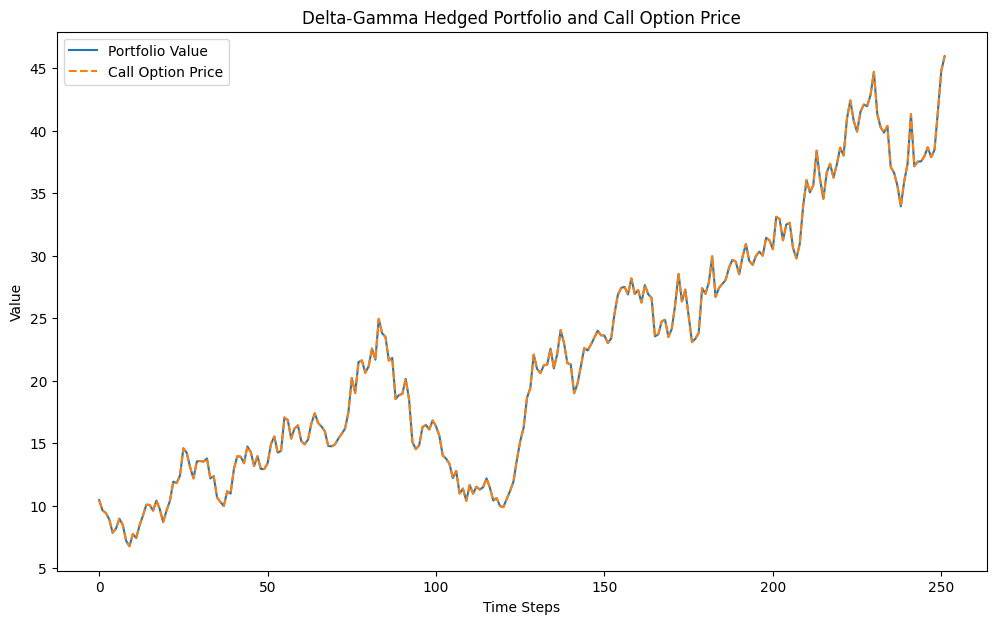

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = np.where(T <= 0, np.maximum(S-K, 0), S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    return call_price

def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    delta = np.where(T <= 0, 1.0 * (S > K), norm.cdf(d1))
    return delta

def gamma_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = np.where(T <= 0, 0, norm.pdf(d1) / (S * sigma * np.sqrt(T)))
    return gamma

# Parameters
S0, K, T, r, sigma, mu = 100, 100, 1, 0.05, 0.2, 0.3
dt, N = 1/252, int(T / (1/252))

# Simulate stock path
stock_price_changes = (mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.randn(N-1)
S = S0 * np.exp(np.cumsum(np.insert(stock_price_changes, 0, 0)))

# Time to maturity for each step
T_remaining = T - np.arange(N) * dt
# Calculate option prices and Greeks
call_prices = black_scholes_call(S, K, T_remaining, r, sigma)
option_prices = black_scholes_call(S, K+20, T_remaining+1 , r, sigma)
D = delta_call(S, K, T_remaining, r, sigma)
G = gamma_call(S, K, T_remaining, r, sigma)
D_option = delta_call(S, K+20, T_remaining+1 , r, sigma)
G_option = gamma_call(S, K+20, T_remaining+1 , r, sigma)

# Calculate A, B, stock, option, and bank investments
B = G / G_option
A = D - B * D_option
option_investment = B * option_prices
stock_investment = A * S
bank_investment = np.zeros(N)
bank_investment[0] = call_prices[0] - stock_investment[0] - option_investment[0]

# Update bank investment for each step
for t in range(1, N):
    bank_investment[t] = bank_investment[t-1] * np.exp(r * dt) - (stock_investment[t] - A[t-1] * S[t]) - (option_investment[t] - B[t-1] * option_prices[t])

# Calculate portfolio value
Pi = bank_investment + option_investment + stock_investment #- call_prices

# Plot results
plt.figure(figsize=(12, 7))
plt.plot(Pi, label='Portfolio Value')
plt.plot(call_prices, label='Call Option Price', linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Delta-Gamma Hedged Portfolio and Call Option Price')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


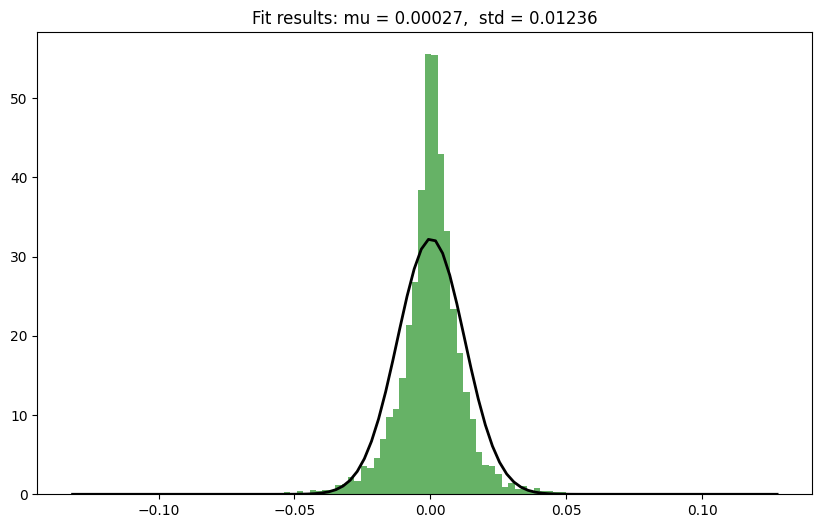

In [5]:
# %pip install yfinance
import yfinance as yf #use pip install yfinance if yfinance not installed
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_real_sp500_returns_with_gaussian():
    # Fetch S&P 500 data from Yahoo Finance
    sp500 = yf.download('^GSPC', start='2000-01-01', end='2024-01-01')

    # Calculate daily returns
    sp500['Daily Return'] = sp500['Adj Close'].pct_change()

    # Drop NaN values
    returns = sp500['Daily Return'].dropna()

    # Plot histogram of the returns
    plt.figure(figsize=(10, 6))
    count, bins, ignored = plt.hist(returns, 100, density=True, alpha=0.6, color='g')

    # Fit a Gaussian curve to the data
    mu, std = norm.fit(returns)

    # Plot the Gaussian curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = {:.5f},  std = {:.5f}".format(mu, std)
    plt.title(title)

    plt.show()

plot_real_sp500_returns_with_gaussian()


### Does Black-Scholes model the market?

The following table presents a selection of call options for Apple Inc. (AAPL), which is currently trading at $\$189$. These options have an expiration date of January 17, 2025 with $r=5.31\%$ ($r$ is found using the SOFR)	

| Strike Price | Current Price | 
|--------------|------------|
| $165.00      | $36.56     | 
| $170.00      | $32.97     | 
| $175.00      | $29.73     | 
| $180.00      | $25.75     | 
| $185.00      | $22.70     |
| $190.00      | $19.86     | 
| $195.00      | $17.00     |
| $200.00      | $14.50     | 
| $205.00      | $12.61     | 
| $210.00      | $10.23     | 

In [13]:
from datetime import datetime
def calculate_days_to_expiration(current_date, expiration_date):
    """
    Calculate the number of days from the current date to the expiration date.

    Parameters:
    current_date (str): Current date in the format 'YYYY-MM-DD'
    expiration_date (str): Expiration date in the format 'YYYY-MM-DD'

    Returns:
    int: Number of days from the current date to the expiration date
    """
    # Convert strings to datetime objects
    current_date = datetime.strptime(current_date, '%Y-%m-%d')
    expiration_date = datetime.strptime(expiration_date, '%Y-%m-%d')
    
    # Calculate the difference in days
    days_to_expiration = (expiration_date - current_date).days
    
    return days_to_expiration

current_date = '2024-02-07'  # February 7, 2024
expiration_date = '2025-01-17'  # January 17, 2025
days_to_expiration = calculate_days_to_expiration(current_date, expiration_date)
# Given parameters
S0 = 189  # Current stock price of AAPL
r = 0.0531  # Risk-free interest rate (annualized) Currently # 5.31
T = days_to_expiration / 365  # Time to expiration in years

# Table of options
options = [
    {"Strike Price": 165.00, "Volatility": 20},
    {"Strike Price": 170.00, "Volatility": 20},
    {"Strike Price": 175.00, "Volatility": 20},
    {"Strike Price": 180.00, "Volatility": 20},
    {"Strike Price": 185.00, "Volatility": 20},
    {"Strike Price": 190.00, "Volatility": 20},
    {"Strike Price": 195.00, "Volatility": 20},
    {"Strike Price": 200.00, "Volatility": 20},
    {"Strike Price": 205.00, "Volatility": 20},
    {"Strike Price": 210.00, "Volatility": 20},
]

# Calculate and print the Black-Scholes price for each option
for option in options:
    X = option["Strike Price"]
    sigma = option["Volatility"] / 100  # Convert percentage to decimal
    black_scholes_price = black_scholes_call(S0, X, T, r, sigma)
    print(f"Strike Price: ${X}, Black-Scholes Price: ${black_scholes_price:.2f}")

Strike Price: $165.0, Black-Scholes Price: $35.10
Strike Price: $170.0, Black-Scholes Price: $31.37
Strike Price: $175.0, Black-Scholes Price: $27.88
Strike Price: $180.0, Black-Scholes Price: $24.62
Strike Price: $185.0, Black-Scholes Price: $21.60
Strike Price: $190.0, Black-Scholes Price: $18.85
Strike Price: $195.0, Black-Scholes Price: $16.34
Strike Price: $200.0, Black-Scholes Price: $14.09
Strike Price: $205.0, Black-Scholes Price: $12.08
Strike Price: $210.0, Black-Scholes Price: $10.29


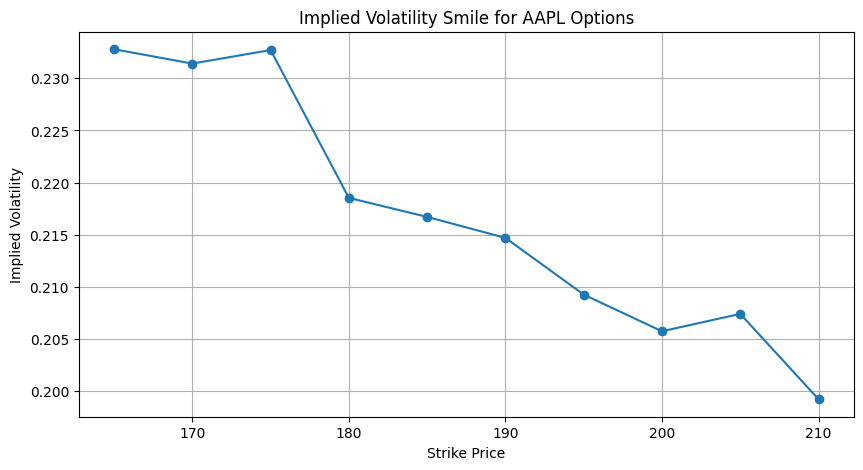

In [15]:
import numpy as np
import scipy.stats as stats
from scipy.optimize import brentq
import matplotlib.pyplot as plt
import pandas as pd

# Define the Black-Scholes price for a European call option
def black_scholes_call(S0, E, T, r, sigma):
    d1 = (np.log(S0 / E) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * stats.norm.cdf(d1) - E * np.exp(-r * T) * stats.norm.cdf(d2)

# Function to calculate implied volatility
def implied_volatility_call(S0, E, T, r, market_price):
    def difference_in_price(sigma):
        return black_scholes_call(S0, E, T, r, sigma) - market_price
    implied_vol = brentq(difference_in_price, 0.01, 3)
    return implied_vol

# Market data
S0 = 189
r = 0.0531
T = (pd.to_datetime('2025-01-17') - pd.to_datetime('2024-02-07')).days / 365.25

# Options data
options_data = {
    'Strike Price': [165, 170, 175, 180, 185, 190, 195, 200, 205, 210],
    'Current Price': [36.56, 32.97, 29.73, 25.75, 22.70, 19.86, 17.00, 14.50, 12.61, 10.23]
}

# Calculate implied volatility for each option
implied_vols = []
for E, market_price in zip(options_data['Strike Price'], options_data['Current Price']):
    iv = implied_volatility_call(S0, E, T, r, market_price)
    implied_vols.append(iv)

# Plot the implied volatility smile
plt.figure(figsize=(10, 5))
plt.plot(options_data['Strike Price'], implied_vols, marker='o')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility Smile for AAPL Options')
plt.grid(True)
plt.show()


### Stochastic Volatility Models

The Heston model:

1. **Asset Price Dynamics**:
   $$ dS_t = \mu S_t dt + \sqrt{\nu_t} S_t dW_{S_t} $$

2. **Volatility Dynamics**:
   $$ d\nu_t = \kappa (\theta - \nu_t) dt + \xi \sqrt{\nu_t} dW_{\nu_t} $$

where:
- $S_t$ is the stock price at time $t$.
- $\nu_t$ is the variance rate at time $t$.
- $\mu$ is the expected return rate of the stock.
- $\kappa$ is the rate of mean reversion for the variance.
- $\theta$ is the long-run average price variance.
- $\xi$ is the volatility of the volatility (vol of vol).
- $dW_{S_t}$ and $dW_{\nu_t}$ are two Wiener processes with correlation $\rho$.

The Heston model allows for the volatility of the asset to be stochastic and mean-reverting, which is a more realistic scenario than constant volatility assumed in the Black-Scholes model.




# The Rough Bergomi Model

The rough Bergomi model is represented by $ \mathcal{M}^{\text{Bergomi}}(\theta^{\text{Bergomi}}) $, with parameters $\theta =(\xi_0, \nu, \rho, H) \in \Theta^{\text{Bergomi}} $. 

The stock price dynamics are given by the stochastic differential equation (SDE):
$$
dX_t = -\frac{1}{2} V_t dt + \sqrt{V_t} dW_t, \quad \text{for } t > 0, \quad X_0 = 0,
$$

where $ V_t $ is the instantaneous variance, modeled as:
$$
V_t = \xi_0(t) \mathcal{E} \left( \sqrt{2H} \int_0^t (t-s)^{H-\frac{1}{2}} dZ_s \right), \quad \text{for } t > 0, \quad V_0 = \xi_0 > 0
$$

- $ X_t $ represents the log of the stock price.
- $ V_t $ is the variance process.
- $ W_t $ and $ Z_t$ are Brownian motions with correlation $ \rho $.
- $ H $ is the Hurst parameter, which reflects the roughness of the paths.
- $ \xi_0(t) $ is the initial forward variance curve.
- $\mathcal{E}$ is the stochastic exponential

(See the new book 'Rough Volatility')


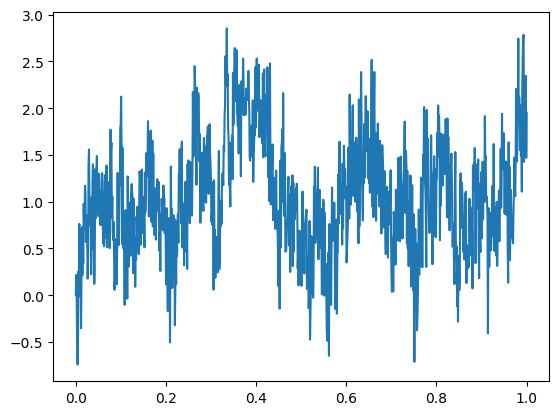

In [21]:
#Plot fractional Brownian Motion

#%pip install fbm
from fbm import FBM

f = FBM(n=1024, hurst=0.1, length=1, method='daviesharte')

fbm_sample = f.fbm()
t_values = f.times()
plt.plot(t_values, fbm_sample)



# Calibration of Volatility Models

Calibration of volatility models is a crucial step in ensuring that the model accurately reflects market data. The objective is to find the model parameters that best fit observed option prices. This process involves optimization techniques to minimize the difference between the market prices and the model prices.

## Mathematical Formulation

The calibration problem can be mathematically formulated as an optimization problem:

$$ \min_{\theta} \sum_{i=1}^{N} \left( P_{\text{market},i} - P_{\text{model},i}(\theta) \right)^2 $$

where:
- $ \theta $ represents the parameters of the volatility model,
- $ N $ is the number of observed market prices,
- $ P_{\text{market},i} $ is the market price of the $ i $-th option,
- $ P_{\text{model},i}(\theta) $ is the model price of the $ i$-th option computed with parameters $ \theta $.

See the paper: 'Deep Learning Volatility' by Blanka Horvath.

## Deep Hedging
### Question 1
We know how to hedge in a continous time, cost free, infinite depth complete market but how do we hedge in the 'real world'?

Real World:
- Transaction Costs
- Market Impact
- Liquidity Constraints
- People are not 'Risk Neutral'


#### Answer 1

Let the neural networks do it!

 ### Introduction to Markov Decision Processes (MDP)


An MDP is defined by a tuple $(S, A, r, p)$:

- $S \subset \mathbb{R}^d$: A continuous/discrete set of states the agent can observe, representing the environment's status.
- $A \subset \mathbb{R}^n$: A continuous/discrete set of actions the agent can take.
- $r(s_t, a_t)$: A reward function returning a scalar value, given the current state $s_t$ and action $a_t$.
- $p(s_{t+1} | s_t, a_t)$: Transition dynamics defining the probability of reaching a new state $s_{t+1}$ given the current state $s_t$ and action $a_t$.

The agent's objective is to find a policy $\pi: S \rightarrow A$ that maximizes the expected return from any given state, which is the sum of future rewards:

$$ R^\pi(s_t) = \sum_{i=t}^{T} r(s_i, a_i)  $$

The value function $V^\pi(s_t)$ is the expected return when following a policy $\pi$ from state $s_t$:

$$ V^\pi(s_t) = \mathbb{E}[R^\pi(s_t) | s_t]  $$

which we can rewrite as

$$ V^\pi(s_t) = \mathbb{E}[r(s_t, a_t^\pi) + V^\pi(s_{t+1})] $$





### REINFORCE and Actor Critic Algorithms

In policy based reinforcement learning, the goal is to maximize the agent's reward.

$$ J(\pi_\theta) = \mathbb{E}_{\tau\sim \pi_\theta}\big[R(\tau) \big]$$

where  $\tau = (s_{0}, a_{0},\dots, s_{T+1}$) with action chosen from $\displaystyle \pi_{\theta}$.

To update the parameters $\theta$ of the policy, one has to do gradient ascent: $\theta_{k+1} = \theta_{k} + \alpha \nabla_{\theta}J(\pi_{\theta})|_{\theta_{k}}$.

**The Policy Gradient Theorem:** $$ \nabla_{\theta} J(\pi_{\theta}) = \mathbb{E}_{\tau\sim \pi_\theta}\left[{\sum_{t=0}^{T} \nabla_{\theta} \log \pi_{\theta}(a_t |s_t) R(\tau)}\right]$$

We then approximate $\nabla_{\theta}(\pi_{\theta})$ using Monte Carlo and update our policy weights $\theta$ accordingly.

$R(\tau)$ has a high variance and therefore  needs lots of trajectories to converge.

We can show: 
 $$  \nabla_{\theta} J(\pi_{\theta}) = \mathbb{E}_{\tau \sim \pi_{\theta}}\left[{\sum_{t=0}^{T} \nabla_{\theta} \log \pi_{\theta}(a_t |s_t) \sum_{t'=t}^T  R(s_{t'}, a_{t'}, s_{t'+1})}\right].$$
 which reduces variance by not looking at past rewards.
 
We can substract a baseline $b(s_t)$ to reduce variance.

For our Actor-Critic algorithm, we chose $V^\pi(s_t)$.
So we have
$$ \nabla_{\theta} J(\pi_{\theta}) = \mathbb{E}_{\tau \sim \pi_{\theta}}{\sum_{t=0}^{T} \nabla_{\theta} \log \pi_{\theta}(a_t |s_t) \left(\sum_{t'=t}^T R(s_{t'}, a_{t'}, s_{t'+1}) - V^\pi(s_t)\right)}$$

As $V^\pi$ is unknown, we will use a neural network to approximate $V^\pi$ with Mean Square Error as the loss function.

$$ \arg \min_{\phi} \mathbb{E}_{s_t, \hat{R}_t \sim \pi_k}{\left( V_{\phi}(s_t) - \hat{R}_t \right)^2}, $$

## One-Step Update in Actor-Critic Algorithm

In the Actor-Critic framework, we refine the policy update process by leveraging the concept of the advantage function, leading to a more immediate, one-step update mechanism.

### Advantage Function

The advantage function $A^\pi(s, a)$ quantifies the relative benefit of choosing action $a$ in state $s$ over the average action according to the current policy $\pi$. It is defined as:

$$ A^\pi(s_t, a_t) = R(s_t, a_t, s_{t+1}) + V^\pi(s_{t+1}) - V^\pi(s_t) $$

where:
- $R(s_t, a_t, s_{t+1})$ is the immediate reward received after action $a_t$ in state $s_t$,
- $V^\pi(s)$ is the value function under policy $\pi$.

### Policy Gradient Update

Incorporating the advantage function into the policy gradient results in the one-step update formula:

$$ \nabla_{\theta} J(\pi_{\theta}) = \mathbb{E}_{s_t, a_t \sim \pi_{\theta}}{\left[ \nabla_{\theta} \log \pi_{\theta}(a_t | s_t) A^\pi(s_t, a_t) \right]}. $$



### Critic Update

The critic, approximating $V^\pi(s)$, minimizes the mean square error between its predictions and observed returns. For a one-step lookahead, the observed return $\hat{R}_t$ becomes:

$$ \hat{R}_t = R(s_t, a_t, s_{t+1}) + V_{\phi}(s_{t+1}) $$

yielding the critic's loss function as:

$$ \arg \min_{\phi} \mathbb{E}_{s_t, a_t, s_{t+1} \sim \pi_{\theta}}{\left( V_{\phi}(s_t) - (R(s_t, a_t, s_{t+1}) + V_{\phi}(s_{t+1})) \right)^2} $$





### Risk Adverse Reinforcement Learning



In finance, a utility function quantifies an investor's preference over different levels of wealth or portfolio performance. It captures the trade-off between risk and reward in the face of uncertainty.

 
 In deep hedging, we will assess our policy with respect to the certainty equivalent of the exponential utility instead of the expected value.

$$ U_\lambda(X) = -\frac{1}{\lambda} \log \mathbb{E}[\exp(-\lambda X)] $$

where:
- $ X $ is a random variable representing future cash flows or returns,
- $ \lambda > 0 $ is the risk-aversion parameter, with higher values indicating greater risk aversion.

**Example:** Let $X\sim N(0,1)$, then $U_\lambda(X)=-\frac{\lambda}{2}$

Taking a taylor seires expansion, we see:

$$U_\lambda(X) = \mathbb{E}[X]-\lambda/2 \text{ Var}[X]+\mathcal{O}(\lambda^2)$$

The exponential utility has the limits:
- As $ \lambda \rightarrow 0 $, it approaches the expected value $ \mathbb{E}[X] $ (risk-neutral).
- As $ \lambda \rightarrow \infty $, it approaches the worst-case scenario $\inf X $.



### Risk-Averse Actor-Critic Algorithm

The objective shifts from maximizing expected returns to maximizing the utility-based value function under policy $\pi$:
$$ V^\pi(s_t) = U_\lambda \left( \sum_{i=t}^{T} r(s_i, a_i) \right)  $$

### Risk-Averse Bellman Equation
The Bellman equation is reformulated to incorporate the exponential utility, resulting in:
$$ V^\pi(s_t) = -\frac{1}{\lambda} \log \mathbb{E} \left[\exp\left(-\lambda \left( r(s_t, a_t) + V^\pi(s_{t+1}) \right)\right)\right]  $$

### Policy and Value Updates
Policy updates are based on the exponentiated objective, aiming to solve:
$$ \inf_{\pi} \frac{1}{\lambda} \exp(-\lambda V^\pi(s_t)) $$

Value updates follow a similar exponentiated form, aligning with the risk-averse Bellman equation:
$$ \exp(-\lambda V^\pi(s_t)) = \mathbb{E}[\exp(-\lambda (r(s_t, a_t) + V^\pi(s_{t+1})))] $$





#### Policy Update
The policy is updated by maximizing the exponentiated utility-based objective, using the loss function:

$$ L(\theta) = \mathbb{E} \left[ \frac{1}{\lambda} \exp \left( -\lambda \left( r_t + V_\phi (s_{t+1}) \right) \right) \right] $$

#### Critic Update
The critic update involves minimizing a smoothed loss function, which maintains the risk-averse Bellman equation:

$$ L(\phi) = \mathbb{E} \left[ \frac{1}{\lambda} \exp \left( -\lambda \left( y_t - V_\phi (s_t) \right) \right) - V_\phi (s_t) \right] $$

with the gradient given by:

$$ \nabla_\phi L(\phi) = \mathbb{E} \left[ \left( \exp \left( -\lambda \left( y_t - V_\phi (s_t) \right) \right) - 1 \right) \nabla_\phi V_\phi (s_t) \right]  $$


#### Training Across Risk Levels
The algorithm learns policies for different risk aversion levels by sampling $\lambda$ uniformly from an interval $[\lambda_{\text{min}}, \lambda_{\text{max}}]$.



## Market Environment for Deep Hedging

In deep hedging, the financial market is modeled over discrete time steps. The market state at time $t$, denoted as $m_t$, encompasses all relevant information such as current prices, historical data, and other market indicators.

### Portfolio and Hedging Instruments
- The trader's portfolio, $z_t \in Z$, evolves over time due to market changes and trading actions.
- The trader has access to $n$ hedging instruments $h_t$, which may vary across market states in terms of time-to-maturities and strikes relative to at-the-money.

### Trading Dynamics
- Trading action at time $t$ is represented by $a_t \in \mathbb{R}^n$, adjusting the portfolio to $z_{t+1} = z'_{t+1} + a_t \cdot h'_{t+1}$.
- $z'_{t+1}$ is our portfolio $z_t$ evaluated at the next time step and $h'_{t+1}$ represents the avaliable instruments to trade at time $t+1$.

### Costs and Rewards
- Trading incurs a transaction cost $c(s, a)$, which is convex and normalized such that $c(s, 0) = 0$.
- The reward function is given by:
$$ r(s_t, a_t) = r(z_t) - a_t \cdot h_t - c(s_t, a_t)$$
- The reward includes cashflows from the portfolio, costs of traded instruments, and transaction costs.

### Market Impact and Cashflows
- It is assumed that trading actions have no market impact ($p(m_{t+1}|s_t, a_t) = p(m_{t+1}|m_t)$).
- The portfolio generates random cashflows $r(z_t)$ based on the market state.

### Book Value and Episode Termination
- The book value $B(z)$ represents the mark-to-market value of the portfolio using current market data.
- At the end of an episode, any outstanding positions are valued at their book value, with $r_T = B(z_T)$, simulating the liquidation of the remaining portfolio.




## Shannon's Demon and the Rebalancing Paradox

Consider an asset that, at each time step, either doubles in value or halves in value, with equal probability. If we start with 1 unit of this asset, the possible values after one time step are 2 (with probability 0.5) or 0.5 (with probability 0.5).

Now, let's consider a rebalanced portfolio. Suppose we start with 1 unit and invest half in the doubling/halving asset and half in a risk-free asset with a return of 0. After the first time step, the portfolio value will be either 1.25 (if the risky asset doubled) or 0.75 (if it halved).



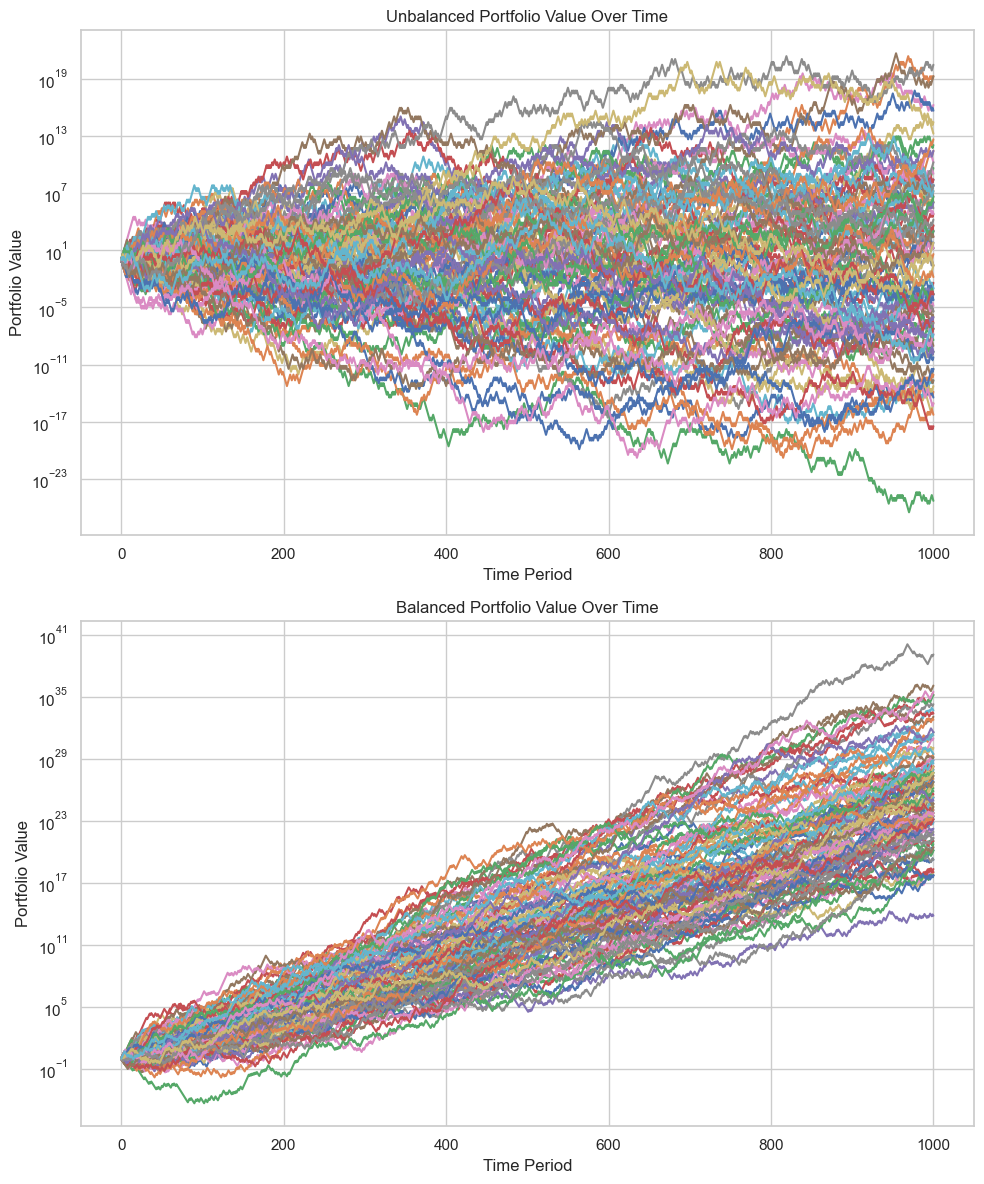

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

n_simulations = 100
n_periods = 1000  # Number of periods in each simulation
up_factor = 2 # Asset goes up by 100%
down_factor = .5  # Asset goes down by 50%%

# Function to simulate the process over time for visualization
def simulate_process_over_time(n_periods, up_factor, down_factor, n_simulations, balanced=True):
    all_paths = np.zeros((n_simulations, n_periods + 1))  # +1 to include the initial value
    for i in range(n_simulations):
        values = [1]  # Start each simulation with a value of 1
        stock = 0.5  # Initial stock proportion for balanced portfolio
        cash = 0.5  # Initial cash proportion for balanced portfolio
        for _ in range(n_periods):
            if np.random.rand() < 0.5:
                change_factor = up_factor
            else:
                change_factor = down_factor
            
            if balanced:
                # Update stock value and rebalance
                stock *= change_factor
                total = stock + cash
                stock = total / 2
                cash = total / 2
                values.append(stock + cash)
            else:
                # Update value without rebalancing
                values.append(values[-1] * change_factor)
                
        all_paths[i] = values

    return all_paths

# Generate paths
unbalanced_paths = simulate_process_over_time(n_periods, up_factor, down_factor, n_simulations, balanced=False)
balanced_paths = simulate_process_over_time(n_periods, up_factor, down_factor, n_simulations, balanced=True)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Unbalanced Portfolio Paths
for path in unbalanced_paths:
    axs[0].plot(path)
axs[0].set_title('Unbalanced Portfolio Value Over Time')
axs[0].set_xlabel('Time Period')
axs[0].set_ylabel('Portfolio Value')
axs[0].set_yscale('log')
# Balanced Portfolio Paths
for path in balanced_paths:
    axs[1].plot(path)
axs[1].set_title('Balanced Portfolio Value Over Time')
axs[1].set_xlabel('Time Period')
axs[1].set_ylabel('Portfolio Value')
axs[1].set_yscale('log')
plt.tight_layout()
plt.show()


## Portfolio Optimization

Consider a portfolio with $n$ assets, and a weight vector $w = (w_1, w_2, \dots, w_n)$ representing the proportions of each asset in the portfolio.

## Expected Portfolio Return

The expected portfolio return, $E(R_p)$, can be calculated as:

$$
E(R_p) = \sum_{i=1}^n w_i E(R_i).
$$


## Portfolio Variance

Portfolio variance, $Var(R_p)$, can be calculated as:

$$
Var(R_p) = \sum_{i=1}^n \sum_{j=1}^n w_i w_j Cov(R_i, R_j).
$$
## Introduction to the Covariance Matrix
 

The covariance matrix is a symmetric, positive semi-definite matrix with dimensions equal to the number of assets in the portfolio. The diagonal elements of the matrix represent the variances of the individual assets, while the off-diagonal elements represent the covariances between pairs of assets. 
The covariance matrix for three assets is given by:
$$
\Sigma = 
\begin{bmatrix}
\sigma_{1}^2 & \sigma_{12} & \sigma_{13} \\
\sigma_{12} & \sigma_{2}^2 & \sigma_{23} \\
\sigma_{13} & \sigma_{23} & \sigma_{3}^2
\end{bmatrix}
$$

### Formula for Calculating Portfolio Variance Using Covariance Matrix

Given a portfolio with $n$ assets, and a weight vector $w = (w_1, w_2, \dots, w_n)$ representing the proportions of each asset in the portfolio, the portfolio variance can be calculated using the covariance matrix $\Sigma$ :

$$
\text{Portfolio Variance} = w^T \Sigma w.
$$



In [1]:
# Example of covariance matrix
#%pip install yfinance

import yfinance as yf

tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'META']
start_date = '2018-01-01'
end_date = '2024-01-01'
data = yf.download(tickers, start=start_date, end=end_date)
adj_close = data['Adj Close']
returns = adj_close.pct_change().dropna()
daily_covariance_matrix = returns.cov(ddof=1)
covariance_matrix = daily_covariance_matrix * 252
print(covariance_matrix)

[*********************100%%**********************]  5 of 5 completed

Ticker      AAPL      AMZN     GOOGL      META      MSFT
Ticker                                                  
AAPL    0.100343  0.069905  0.066703  0.077528  0.071554
AMZN    0.069905  0.125078  0.074074  0.091815  0.074206
GOOGL   0.066703  0.074074  0.097511  0.088813  0.072175
META    0.077528  0.091815  0.088813  0.182890  0.078538
MSFT    0.071554  0.074206  0.072175  0.078538  0.090745


In [2]:
# Calculation of portfolio mean and variance
import numpy as np

yearly_returns = returns.mean() * 252
num_stocks = len(tickers)
weights = np.array([1/num_stocks] * num_stocks) # Portfolio of equal weights
portfolio_return = np.dot(weights, yearly_returns)
portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
portfolio_std_dev = np.sqrt(portfolio_variance)

print("Portfolio Return:", portfolio_return)
print("Asset Returns:", yearly_returns)
print("Portfolio Variance:", portfolio_variance)
print("Portfolio Standard Deviation (Volatility):", portfolio_std_dev)

Portfolio Return: 0.24931202611928785
Asset Returns: Ticker
AAPL     0.309906
AMZN     0.219349
GOOGL    0.208735
META     0.204932
MSFT     0.303639
dtype: float64
Portfolio Variance: 0.08508748767285475
Portfolio Standard Deviation (Volatility): 0.2916975962754146


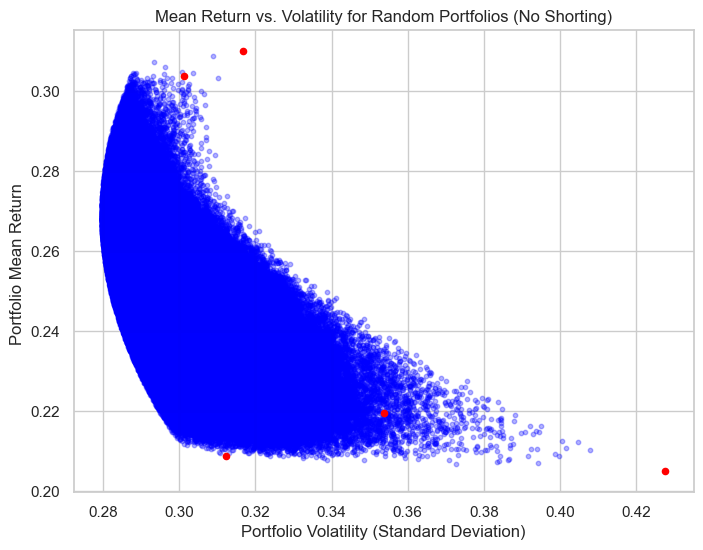

In [6]:
# Plot of mean return vs. volatility for random portfolios
#%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
num_portfolios = 1000000
portfolio_returns = []
portfolio_volatility = []

for _ in range(num_portfolios):
    random_weights = np.random.random(num_stocks)
    random_weights /= np.sum(random_weights)
    portfolio_return = np.dot(random_weights, yearly_returns)
    portfolio_returns.append(portfolio_return)
    portfolio_variance = np.dot(random_weights.T, np.dot(covariance_matrix, random_weights))
    portfolio_volatility.append(np.sqrt(portfolio_variance))

plt.figure(figsize=(8, 6))
plt.scatter(portfolio_volatility, portfolio_returns, c='blue', marker='o', s=10, alpha=0.3)
plt.scatter(np.sqrt(np.diag(covariance_matrix)), yearly_returns, c='red', marker='o', s=20, label='Individual Assets')
plt.xlabel('Portfolio Volatility (Standard Deviation)')
plt.ylabel('Portfolio Mean Return ')
plt.title('Mean Return vs. Volatility for Random Portfolios (No Shorting)')
plt.grid(True)
plt.show()

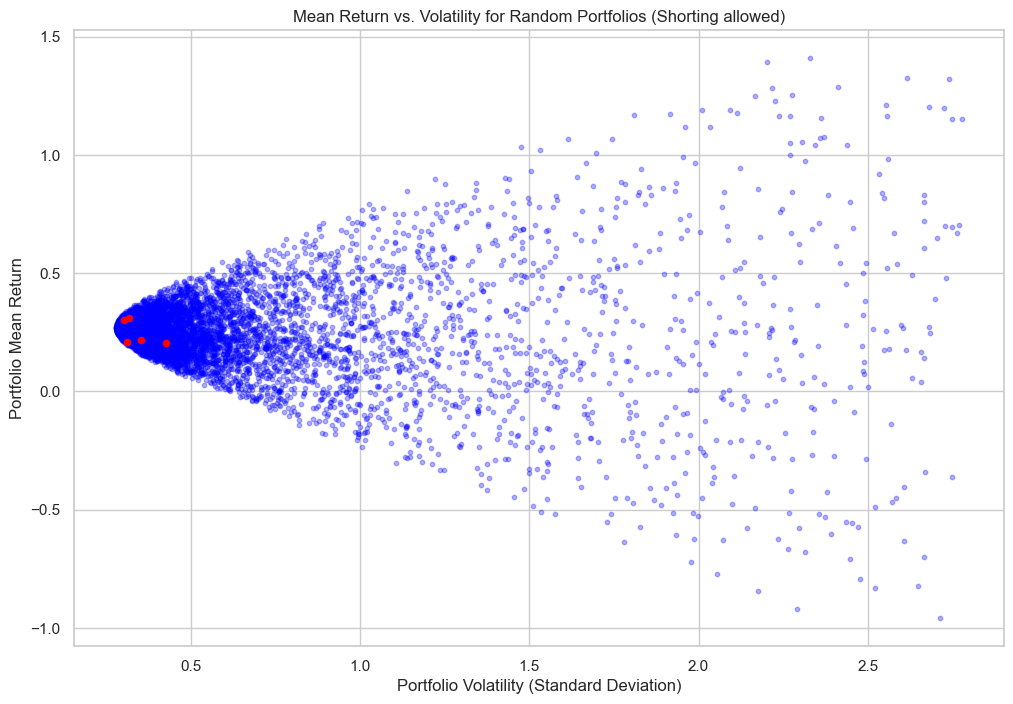

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
num_portfolios = 10000
portfolio_returns = []
portfolio_volatility = []

for _ in range(num_portfolios):
    random_weights = 2*np.random.random(num_stocks)-1
    random_weights /= np.sum(random_weights)
    portfolio_return = np.dot(random_weights, yearly_returns)
    portfolio_returns.append(portfolio_return)
    portfolio_variance = np.dot(random_weights.T, np.dot(covariance_matrix, random_weights))
    portfolio_volatility.append(np.sqrt(portfolio_variance))


filtered_returns = []
filtered_volatility = []
for ret, vol in zip(portfolio_returns, portfolio_volatility):
    if ( vol <= np.percentile(portfolio_volatility, 95)):
        filtered_returns.append(ret)
        filtered_volatility.append(vol)

plt.figure(figsize=(12, 8))
plt.scatter(filtered_volatility, filtered_returns, c='blue', marker='o', s=10, alpha=0.3)
plt.scatter(np.sqrt(np.diag(covariance_matrix)), yearly_returns, c='red', marker='o', s=20, label='Individual Assets')
plt.xlabel('Portfolio Volatility (Standard Deviation)')
plt.ylabel('Portfolio Mean Return')
plt.title('Mean Return vs. Volatility for Random Portfolios (Shorting allowed)')
plt.grid(True)
plt.show()

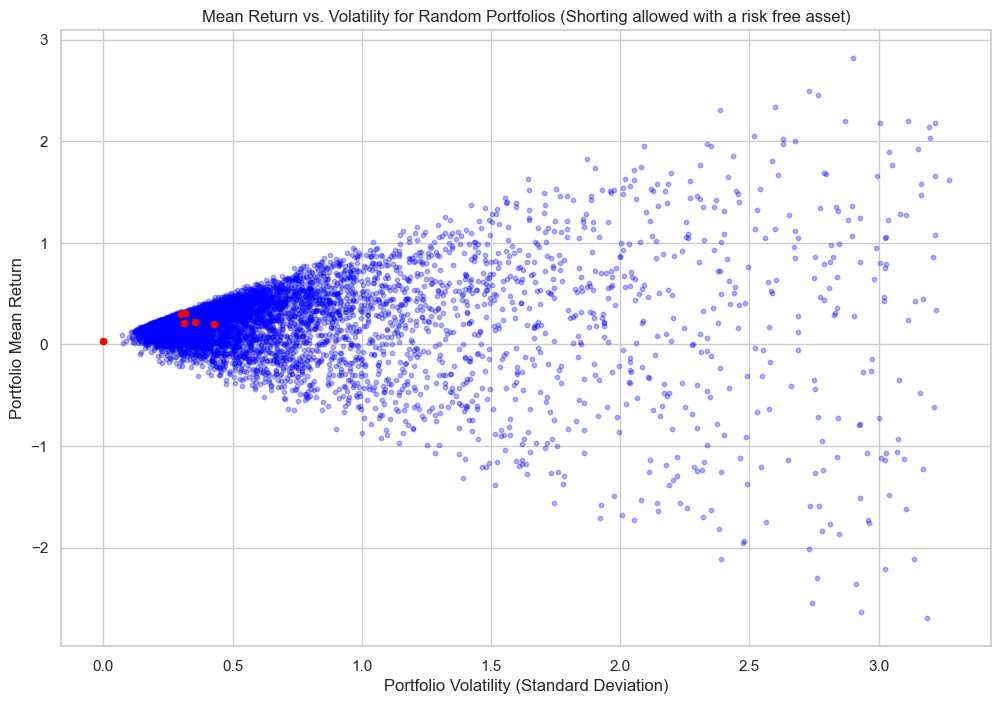

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import copy

sns.set(style="whitegrid")
r=0.03
yearly_returnsr=copy.deepcopy(yearly_returns)
covariance_matrixr=copy.deepcopy(covariance_matrix)
num_stocksr=num_stocks
yearly_returnsr['RF'] = r
covariance_matrixr['RF'] = 0.0
covariance_matrixr.loc['RF'] = 0.0
num_stocksr=num_stocks+1
num_portfolios = 10000
portfolio_returnsr = []
portfolio_volatilityr = []

for _ in range(num_portfolios):
    random_weights = 2*np.random.random(num_stocksr)-1
    random_weights /= np.sum(random_weights)
    portfolio_return = np.dot(random_weights, yearly_returnsr)
    portfolio_returnsr.append(portfolio_return)
    portfolio_variance = np.dot(random_weights.T, np.dot(covariance_matrixr, random_weights))
    portfolio_volatilityr.append(np.sqrt(portfolio_variance))

filtered_returnsr = []
filtered_volatilityr = []
for ret, vol in zip(portfolio_returnsr, portfolio_volatilityr):
    if (vol <= np.percentile(portfolio_volatilityr, 95)):
        filtered_returnsr.append(ret)
        filtered_volatilityr.append(vol)


plt.figure(figsize=(12, 8))
plt.scatter(filtered_volatilityr, filtered_returnsr, c='blue', marker='o', s=10, alpha=0.3)
plt.scatter(np.sqrt(np.diag(covariance_matrixr)), yearly_returnsr, c='red', marker='o', s=20, label='Individual Assets')
plt.xlabel('Portfolio Volatility (Standard Deviation)')
plt.ylabel('Portfolio Mean Return')
plt.title('Mean Return vs. Volatility for Random Portfolios (Shorting allowed with a risk free asset)')
plt.grid(True)
plt.show()

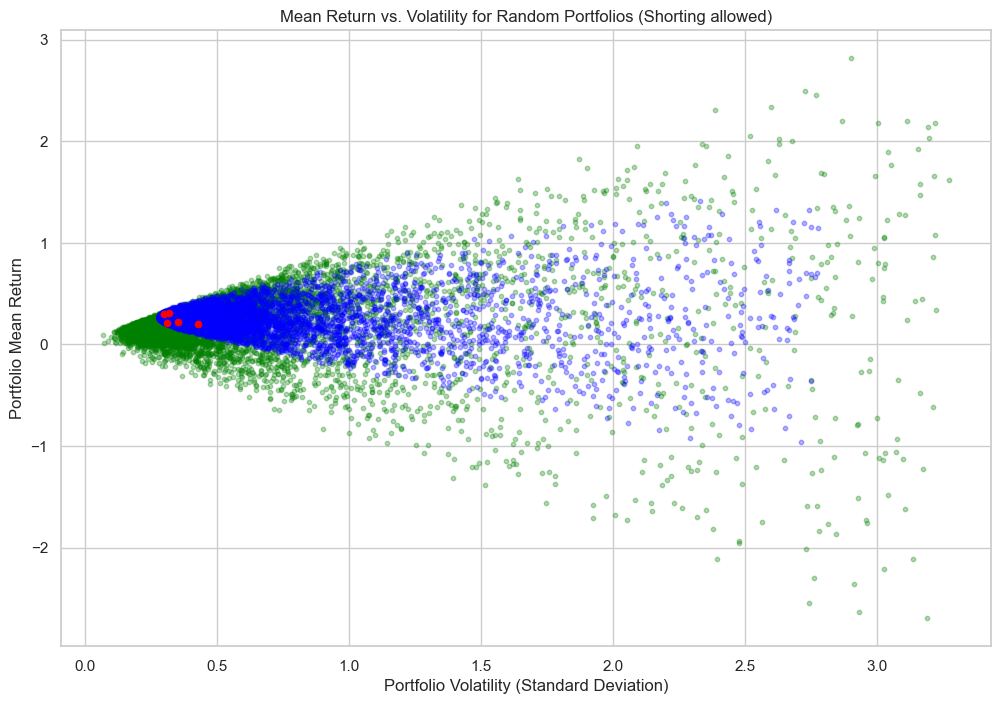

In [8]:
# Plot the  portfolio returns vs. filtered portfolio volatility
plt.figure(figsize=(12, 8))
plt.scatter(filtered_volatilityr, filtered_returnsr, c='green', marker='o', s=10, alpha=0.3)
plt.scatter(filtered_volatility, filtered_returns, c='blue', marker='o', s=10, alpha=0.3)
plt.scatter(np.sqrt(np.diag(covariance_matrix)), yearly_returns, c='red', marker='o', s=20, label='Individual Assets')
plt.xlabel('Portfolio Volatility (Standard Deviation)')
plt.ylabel('Portfolio Mean Return')
plt.title('Mean Return vs. Volatility for Random Portfolios (Shorting allowed)')
plt.grid(True)
plt.show()

## Markowitz Model/ Modern Portfolio Theory


Given $n$ assets with mean returns $\mu_1, \mu_2, ..., \mu_n$, and a covariance matrix $\Sigma$ with entries $\sigma_{ij}$ for $i, j = 1, 2, ..., n$, a portfolio is defined by a set of $n$ weights $w_1, w_2, ..., w_n$ that sum to 1. The Markowitz problem is formulated as:

$$
\begin{aligned}
& \text{minimize} && \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n} w_i w_j \sigma_{ij} \\
& \text{subject to} && \sum_{i=1}^{n} w_i r_i = \bar r \\
& && \sum_{i=1}^{n} w_i = 1
\end{aligned}
$$



### Solution proof

Using the method of Lagrangian multipliers, we can solve the efficient set equations for the Markowitz model.  Let $W = (w_1, w_2, ..., w_n)^T$ be the vector of portfolio weights, $\Sigma$ be the $n \times n$ covariance matrix with elements $\sigma_{ij}$, and $r$ be the vector of expected returns $r_i$. The Markowitz model is formulated as follows:

$$
\min_{W} \quad \frac{1}{2} W^T \Sigma W
$$

Subject to the constraints:

$$
W^T  r = \bar{r}
$$

$$
W^T \mathbf{1} = 1
$$

Where $\mathbf{1}$ is a vector of ones. We now introduce the Lagrange multipliers $\lambda$ and $\mu$ and form the Lagrangian function:

$$
\mathcal{L}(W, \lambda, \mu) = \frac{1}{2} W^T \Sigma W - \lambda (W^T r - \bar{r}) - \mu (W^T \mathbf{1} - 1)
$$

Now we differentiate the Lagrangian with respect to the variables $W$, $\lambda$, and $mnu$ and set the resulting derivatives to zero:

$$
\frac{\partial \mathcal{L}}{\partial W} = \Sigma W - \lambda r - \mu \mathbf{1} = 0
$$

$$
\frac{\partial \mathcal{L}}{\partial \lambda} = W^T r - \bar{r} = 0
$$

$$
\frac{\partial \mathcal{L}}{\partial \mu} = W^T \mathbf{1} - 1 = 0
$$

Now we have a system of $n + 2$ linear equations in $n + 2$ unknowns: the $n$ portfolio weights ($W$), $\lambda$, and $\mu$. Solving this system of equations will give us the efficient set of portfolios.

### Solution of Markowitz Model

The efficient set of portfolios is found by solving the following system of equations:

$$
\begin{aligned}
& \sum_{j=1}^{n} \sigma_{ij} w_j - \lambda r_i - \mu = 0 && \text{for} \ i = 1, 2, ..., n \\
& \sum_{i=1}^{n} w_i r_i = \bar r \\
& \sum_{i=1}^{n} w_i = 1
\end{aligned}
$$

where $\lambda$ and $\mu$ are Lagrange multipliers.

These $n + 2$ linear equations can be solved for the $n + 2$ unknowns: the $n$ portfolio weights ($w_i$), $\lambda$, and $\mu$. The solution to these equations will produce the weights for an efficient portfolio with mean return $\bar r$.


# Two-Fund Theorem: Solving for the Two Funds
The efficient set of portfolios is found by solving the following system of equations:

$$
\begin{aligned}
& \sum_{j=1}^{n} \sigma_{ij} w_j - \lambda r_i - \mu = 0 && \text{for} \ i = 1, 2, ..., n \\
& \sum_{i=1}^{n} w_i r_i = \bar r \\
& \sum_{i=1}^{n} w_i = 1
\end{aligned}
$$

Any portfolio on the efficient frontier can be formed as a linear combination of two other portfolios on the efficient frontier.  To find two funds in the efficient set, we will use the following approach:

1. Set $\lambda = 0$ and $\mu = 1$
2. Set $\lambda = 1$ and $\mu = 0$

Let $\Sigma$ be the covariance matrix of the assets:

$$
\Sigma = 
\begin{pmatrix}
\sigma_{11} & \sigma_{12} & \dots  & \sigma_{1n} \\
\sigma_{21} & \sigma_{22} & \dots  & \sigma_{2n} \\
\vdots      & \vdots      & \ddots & \vdots      \\
\sigma_{n1} & \sigma_{n2} & \dots  & \sigma_{nn} \\
\end{pmatrix}
$$

Now, let's find the two funds using the matrix equation:

## Fund 1: $\lambda = 0$ and $\mu = 1$

Note, this portfolio is the minimum variance protfolio as well. To solve for the first fund, we have the matrix equation:

$$
\begin{pmatrix}
\sigma_{11} & \sigma_{12} & \dots  & \sigma_{1n} \\
\sigma_{21} & \sigma_{22} & \dots  & \sigma_{2n} \\
\vdots      & \vdots      & \ddots & \vdots      \\
\sigma_{n1} & \sigma_{n2} & \dots  & \sigma_{nn} \\
\end{pmatrix}  
\begin{pmatrix}
x_{A}^{(1)} \\
x_{A}^{(2)} \\
\vdots      \\
x_{A}^{(n)}\\
\end{pmatrix}=\begin{pmatrix}
1 \\
1 \\
\vdots\\
1\\
\end{pmatrix}
$$

Where $\mathbf{1}$ is a vector of ones and $x_A$ is the weight vector of the first fund. Solve the matrix equation to obtain the weight vector $x_A$. Normalize the weights in $x_A$ to make them sum to one:

$$
w_A = \frac{x_A}{\sum_{i=1}^{n} x_{A}^{(i)}}
$$

## Fund 2: $\lambda = 1$ and $\mu = 0$

To solve for the second fund, we have the matrix equation:

$$

\begin{pmatrix}
\sigma_{11} & \sigma_{12} & \dots  & \sigma_{1n} \\
\sigma_{21} & \sigma_{22} & \dots  & \sigma_{2n} \\
\vdots      & \vdots      & \ddots & \vdots      \\
\sigma_{n1} & \sigma_{n2} & \dots  & \sigma_{nn} \\
\end{pmatrix}  
\begin{pmatrix}
x_{B}^{(1)} \\
x_{B}^{(2)} \\
\vdots      \\
x_{B}^{(n)}\\
\end{pmatrix}=\begin{pmatrix}
\bar{r}_1 \\
\bar{r}_2 \\
\vdots      \\
\bar{r}_n\\
\end{pmatrix}
$$

Where $\bar{r}$ is the vector of expected returns and $x_B$ is the weight vector of the second fund. Solve the matrix equation to obtain the weight vector $x_B$. Normalize the weights in $x_B$ to make them sum to one:

$$
w_B = \frac{x_B}{\sum_{i=1}^{n} x_{B}^{(i)}}
$$

## Finding any Fund on the Efficient Frontier

Now that we have found the two funds $w_A$ and $w_B$, we can find any other fund on the efficient frontier by forming a combination of these two funds:

$$
w = (1-\alpha) w_A + \alpha w_B
$$

The resulting portfolio $w$ will be on the efficient frontier.


## Problem 1

**Problem Statement:**

Your grandma recently learned that you're taking a Finance course, and she's excited to get your help in creating an investment portfolio for her! She loves the idea of minimizing her portfolio volatility while maintaining a certain level of return. She's decided to invest in 10 specific stocks that she loves, and she would like you to create an optimal portfolio using the Two-Fund Theorem.  She has a desired return of $15$%, and she wants you to minimizing her portfolio volatility while achieving this target. Use the Two-Fund Theorem to construct the portfolio

**List of Stocks:**

1. AAPL (Apple Inc.)
2. MSFT (Microsoft Corporation)
3. AMZN (Amazon.com, Inc.)
4. GOOGL (Alphabet Inc.)
5. META (META, Inc.)
6. TSLA (Tesla, Inc.)
7. BRK-B (Berkshire Hathaway Inc.)
8. JPM (JPMorgan Chase & Co.)
9. JNJ (Johnson & Johnson)
10. V (Visa Inc.)


In [26]:
# Solution to porblem 1

import numpy as np
import pandas as pd
import yfinance as yf

# Step 1: Download historical stock data for the 10 stocks
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'TSLA', 'BRK-B', 'JPM', 'JNJ', 'V']

# Download adjusted close price data for the past 5 years
data = yf.download(tickers, start='2018-01-01', end='2023-01-01')['Adj Close']

# Step 2: Calculate daily returns
returns = data.pct_change().dropna()

# Step 3: Calculate mean returns and covariance matrix
mean_returns = returns.mean()*252
cov_matrix = returns.cov()*252

# Step 4: Calculate the weights for the two funds
# Fund 1: lambda = 0, mu = 1
fund1_weights = np.linalg.solve(cov_matrix, np.ones(len(tickers)))
fund1_weights /= fund1_weights.sum()

# Fund 2: lambda = 1, mu = 0
fund2_weights = np.linalg.solve(cov_matrix, mean_returns)
fund2_weights /= fund2_weights.sum()

# Step 5: Calculate the expected return for each fund
fund1_return = fund1_weights @ mean_returns
fund2_return = fund2_weights @ mean_returns 

# Step 6: Calculate the weights for the two funds to achieve the target return
target_return = 0.15
alpha = (target_return - fund1_return) / (fund2_return - fund1_return)

# Step 7: Calculate the final portfolio weights
final_weights_two_fund = alpha * fund2_weights + (1 - alpha) * fund1_weights


#Step 8: Check that we actually achieved the desired return
fund_return = final_weights_two_fund @ mean_returns
vol=(final_weights_two_fund @ cov_matrix @ final_weights_two_fund)**0.5
print(f"Return of constructed portfolio: {(fund_return)*100:,.2f}%")
print(f"Volatility of constructed portfolio: {vol:,.4f}")
print(f"Alpha: {alpha:.2f}")

# Step 9: Create a dataframe with all the neccessary info
variances = returns.var()*252
portfolio_df = pd.DataFrame({'Avg Return': mean_returns,
                             'Variance': variances,
                             'Fund 1 weights': fund1_weights,
                             'Fund 2 weights': fund2_weights,
                             'Final weights': final_weights_two_fund})

# Display the final DataFrame
portfolio_df

[**********************50%%                      ]  5 of 10 completed

[*********************100%%**********************]  10 of 10 completed

Return of constructed portfolio: 15.00%
Variance of constructed portfolio: 0.1946
Alpha: 0.10


,Avg Return,Variance,Fund 1 weights,Fund 2 weights,Final weights
Ticker,,,,,
AAPL,0.287461,0.112125,-0.047409,0.857629,0.044730
AMZN,0.133328,0.128184,0.135439,-0.502095,0.070534
BRK-B,0.116887,0.053967,0.409149,-0.093430,0.357982
GOOGL,0.148950,0.098574,0.065615,-0.386110,0.019626
JNJ,0.096015,0.043549,0.603540,0.162062,0.558594
JPM,0.123783,0.102925,-0.085917,-0.121311,-0.089520
META,0.014218,0.186890,0.007835,-0.720663,-0.066331
MSFT,0.265836,0.096307,-0.133621,1.464100,0.029038
TSLA,0.565226,0.429562,0.014231,0.392713,0.052763


## One-Fund Theorem

The One-Fund Theorem extends the concepts of the Two-Fund Theorem to situations where a risk-free asset is available. When there is a risk-free asset, any portfolio on the efficient set can be found using only one fund in combination with the risk-free asset.

The risk-free asset has a return of $r_f$, and the expected returns of the risky assets are $\bar{r}_1, \bar{r}_2, \dots, \bar{r}_n$. To find the efficient portfolio, we need to solve the following matrix equation:
$$
\begin{pmatrix}
\sigma_{11} & \sigma_{12} & \dots  & \sigma_{1n} \\
\sigma_{21} & \sigma_{22} & \dots  & \sigma_{2n} \\
\vdots      & \vdots      & \ddots & \vdots      \\
\sigma_{n1} & \sigma_{n2} & \dots  & \sigma_{nn} \\
\end{pmatrix}  
\begin{pmatrix}
x_{A}^{(1)} \\
x_{A}^{(2)} \\
\vdots      \\
x_{A}^{(n)}\\
\end{pmatrix}=\begin{pmatrix}
\bar{r}_1-r_f \\
\bar{r}_2-r_f \\
\vdots\\
\bar{r}_n-r_f \\
\end{pmatrix}$$

After solving the matrix equation for $x_A$, we need to normalize the weights to make them sum to one:

$$
w_A = \frac{x_A}{\sum_{i=1}^{n} x_{A}^{(i)}}
$$

Now that we have found the optimal portfolio $w_A$, we can find any other fund on the efficient frontier by forming a combination of this portfolio and the risk free asset:

$$
w = (1-\alpha) r_f +  \alpha w_A
$$

The resulting portfolio $w$ will be on the efficient frontier.

## Problem 2

**Problem Statement:**
You inform your grandma that the goverment is currently giving $5$% returns on short term bonds and you suggest she should incorporate this risk free rate into her portfolio to minimize her variance, while keeping the same return. Your grandma does not like the government too much but she does like minimizing portfolio volatility. She wants you to find out exactly how much will her portolio volatility decrease if she includes the $5$% risk free rate in her portfolio of ten stocks.

**List of Stocks:**

1. AAPL (Apple Inc.)
2. MSFT (Microsoft Corporation)
3. AMZN (Amazon.com, Inc.)
4. GOOGL (Alphabet Inc.)
5. META (META, Inc.)
6. TSLA (Tesla, Inc.)
7. BRK-B (Berkshire Hathaway Inc.)
8. JPM (JPMorgan Chase & Co.)
9. JNJ (Johnson & Johnson)
10. V (Visa Inc.)


In [30]:
# Import necessary libraries
import numpy as np
import pandas as pd

#We'll use the Covaraince matrix and returns vector generated from problem 1:


# Step 1: Define risk-free rate and target return
risk_free_rate = 0.05
target_return = 0.15

# Step 2: Calculate excess returns and weights for the risky portfolio
excess_returns = mean_returns - risk_free_rate
risky_weights = np.linalg.solve(cov_matrix, excess_returns)

# Normalize the weights
risky_weights = risky_weights / risky_weights.sum()

# Step 3: Calculate the weights for the risk-free asset
portfolio_mean_return = risky_weights @mean_returns
desired_risky_weight = (target_return - risk_free_rate) / (portfolio_mean_return - risk_free_rate)
desired_risk_free_weight = 1 - desired_risky_weight

# Step 4: Create the final portfolio
final_weights_one_fund = desired_risky_weight * risky_weights


# Step 5: Calculate the varaince of the portfolio we contructed here and the portfolio from last problem
var_one_fund=final_weights_one_fund.T @ cov_matrix @ final_weights_one_fund
vol_one_fund = np.sqrt(var_one_fund)

var_two_fund=final_weights_two_fund.T @ cov_matrix @ final_weights_two_fund
vol_two_fund = np.sqrt(var_two_fund)

# Step 6: Create a dataframe with all the neccessary info
portfolio_df = pd.DataFrame({
    'Avg Return': mean_returns,
    'Variance': variances,
    'One Fund weights': risky_weights,
    'Final weights': final_weights_one_fund
})



#Step 7: Check that we actually achieved the desired return
fund_return = final_weights_one_fund @ mean_returns+desired_risk_free_weight*risk_free_rate
print(f"Return of constructed portfolio: {(fund_return)*100:,.2f}%")
print(f"Portfolio weight: {desired_risky_weight:.2f}")

print(f"Volatility of two-fund portfolio: {(vol_two_fund)*100:,.2f}%")
print(f"Volatility of one-fund portfolio: {(vol_one_fund)*100:,.2f}%")
print(f"Decrease of volatility by investing in a risk free asset as well: {(vol_two_fund-vol_one_fund)*100:,.2f}%")

portfolio_df


Return of constructed portfolio: 15.00%
Portfolio weight: 0.07
Volatility of two-fund portfolio: 19.46%
Volatility of one-fund portfolio: 8.00%
Decrease of volatility by investing in a risk free asset as well: 11.46%


,Avg Return,Variance,One Fund weights,Final weights
Ticker,,,,
AAPL,0.287461,0.112125,2.072761,0.139922
AMZN,0.133328,0.128184,-1.358069,-0.091677
BRK-B,0.116887,0.053967,-0.768208,-0.051858
GOOGL,0.148950,0.098574,-0.992609,-0.067006
JNJ,0.096015,0.043549,-0.430680,-0.029073
JPM,0.123783,0.102925,-0.168833,-0.011397
META,0.014218,0.186890,-1.698768,-0.114676
MSFT,0.265836,0.096307,3.609251,0.243643
TSLA,0.565226,0.429562,0.900875,0.060814





#### Capital Asset Pricing Model (CAPM)

The Capital Asset Pricing Model (CAPM)  relates the risk of an investment to its expected return. The main assumption of the CAPM is that everyone is rational and invests in a diversified portfolio. We can the descrbe the return of any asset as

$$
\bar{r}_i = r_f + \beta_i (\bar{r}_m - r_f)
$$

where:

- $\bar{r}_i$ is the expected return on asset $i$,
- $r_f$ is the risk-free rate,
- $\bar{r}_m$ is the expected return on the market portfolio, and
- $\beta_i$ is the beta of asset $i$, which measures its sensitivity to the overall market returns.

##### Beta Coefficient

The beta coefficient $\beta_i$ is a measure of the asset's systematic risk, which is the risk that cannot be eliminated through diversification. It is defined as the covariance of the asset's returns with the market returns, scaled by the variance of the market returns:

$$
\beta_i = \frac{\sigma_{i m}}{\sigma^2_m}
$$


In [33]:
#CAPM of AAPL

import yfinance as yf
import numpy as np
import pandas as pd

#Risk-free rate
rf_rate = 0.04

# Download historical data for required assets
ticker = "AAPL"
index_ticker = "^GSPC"  # S&P 500
start = "2018-01-01"
end = "2024-01-01"

ticker_data = yf.download(ticker, start=start, end=end)
index_data = yf.download(index_ticker, start=start, end=end)

# Calculate returns
ticker_returns = ticker_data['Close'].pct_change()[1:]
index_returns = index_data['Close'].pct_change()[1:]

# Calculate covariance of AAPL and S&P 500
covariance = np.cov(ticker_returns, index_returns)[0][1]*252

# Calculate the variance of S&P 500
variance = np.var(index_returns)*252

# Beta is calculated as covariance of returns of AAPL and S&P 500 divided by variance of returns of S&P 500
beta = covariance/variance

# Calculate expected market return
expected_market_return = np.mean(index_returns)*252

# Calculate expected return of AAPL using CAPM
expected_return = rf_rate + beta * (expected_market_return - rf_rate)

# Calculate actual mean return of AAPL
actual_return = np.mean(ticker_returns)*252

print(f"Beta of {ticker}  is {beta:,.2f}")
print(f"Expected return of the market: {expected_market_return:,.2f}")
print(f"Expected return of {ticker} using CAPM: {expected_return:,.2f}")
print(f"Actual yearly return of {ticker}: {actual_return:,.2f}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Beta of AAPL  is 1.22
Expected return of the market: 0.12
Expected return of AAPL using CAPM: 0.13
Actual yearly return of AAPL: 0.30


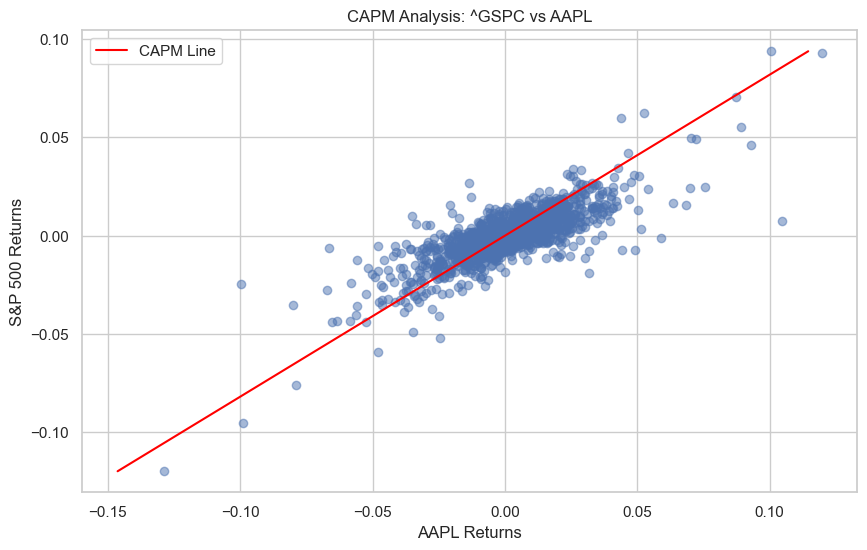

In [36]:
import matplotlib.pyplot as plt
rf_rate = 0.00
# Plotting the returns of AAPL against the S&P 500
plt.figure(figsize=(10, 6))
plt.scatter(ticker_returns,  index_returns,alpha=0.5)
plt.title(f"CAPM Analysis: {index_ticker} vs {ticker}")
plt.xlabel(f"{ticker} Returns")
plt.ylabel("S&P 500 Returns")

# Adding the regression line (CAPM line)
market_returns_range = np.linspace(min(index_returns), max(index_returns), 100)
capm_line = rf_rate + beta * (market_returns_range - rf_rate)
plt.plot( capm_line, market_returns_range, color='red', label='CAPM Line')

plt.legend()
plt.grid(True)
plt.show()

### Systematic Risk vs Non-Systematic Risk

Under CAPM we assume any asset return can be modeled as:
$$
r_i = r_f + \beta_i (r_m - r_f)+e_i
$$
where $e_i$ is some error term not corrolated with other assets.

#### Systematic Risk

This is the risk associated with the market as a whole. Every asset with non-zero beta contains this risk and it cannot be reduced by diversification. It's also known as non-diversifiable risk. The measure of systematic risk in CAPM is denoted by beta ($\beta$).

#### Non-Systematic Risk

Also known as idiosyncratic, or specific risk, this risk is uncorrelated with the market and can be reduced by diversification. It's specific to a particular asset or industry.

In the CAPM, the risk ($\sigma_i^2$) is the sum of these two parts:

$$
\sigma_i^2 = \beta_i^2 \sigma_m^2 + Var(e_i)
$$
Where:
    $\sigma_i^2$ is the total risk,

$\beta_i^2 \sigma_m^2$ is the systematic risk,
    
$\text{Var}(e_i)$ is the non-systematic risk.

Since we can effectivly diversify away idiosyncratic risk, for pricing we only really care about systematic risk and thus $\beta$.

In [38]:
#CAPM of AAPL
import yfinance as yf
import numpy as np
import pandas as pd

#Risk-free rate
rf_rate = 0.04

# Download historical data for required assets
ticker = "AAPL"
index_ticker = "^GSPC"  # S&P 500
start = "2018-01-01"
end = "2024-01-01"

ticker_data = yf.download(ticker, start=start, end=end)
index_data = yf.download(index_ticker, start=start, end=end)

# Calculate returns
ticker_returns = ticker_data['Close'].pct_change()[1:]
index_returns = index_data['Close'].pct_change()[1:]

# Calculate covariance of AAPL and S&P 500
covariance = np.cov(ticker_returns, index_returns, ddof=1)[0][1]*252

# Calculate the variance of S&P 500
variance = np.var(index_returns, ddof=1)*252

# Beta is calculated as covariance of returns of AAPL and S&P 500 divided by variance of returns of S&P 500
beta = covariance/variance

# Calculate the variance of AAPL
ticker_variance = np.var(ticker_returns,  ddof=1)*252

#Calculate idiosyncratic error
idiosyncratic_error=ticker_variance-beta**2*variance

print(f"Idiosyncratic error of {ticker}  is {idiosyncratic_error:,.4f}")
print(f"Total variance of {ticker}  is {ticker_variance:,.4f}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Idiosyncratic error of AAPL  is 0.0368
Total variance of AAPL  is 0.1004


 
### Simple Linear Regression

In simple linear regression, when we have a single input, we can use statistical properties to estimate the coefficients. 
The formula for a simple linear regression model is:

$$Y = \beta_0 + \beta_1X + \epsilon$$

Where $Y$ is the dependent variable, $X$ is the independent variable, $\beta_0$ is the y-intercept, $\beta_1$ is the slope (also called the regression coefficient), and $\epsilon$ is the error term.

The estimates of the coefficients are typically denoted as:

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$

$$\hat{\beta}_1 = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sum{(x_i - \bar{x})^2}} = \frac{\sigma_{x, y}}{\sigma^2_y}$$

Where $\bar{x}$ is the mean of X, $\bar{y}$ is the mean of Y, $x_i$ and $y_i$ are the individual sample points indexed with i, and $\sigma_{x, y}$ and $\sigma^2_y$ are the covariance and variance respectively.

### Multiple Linear Regression

Multiple linear regression is the extension of simple linear regression and can be used when we want to predict a dependent variable using more than one independent variable. 

The formula for a multiple linear regression model is:

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p + \epsilon$$

The estimates for the coefficients, $\hat{\beta}$, can be found by solving the above equation:

$$\hat{\beta} = (X^T X)^{-1}X^T Y$$


# Introduction to Factor Models

Factor models are used to quantify risk and return in a portfolio. They represent each asset's return as a linear function of one or more factors and a random error term.

## Single Factor Model

The single factor model is represented as:

$$
r_i = a_i + b_i f + \epsilon_i,
$$

where $r_i$ is the asset's return, $a_i$ is the intercept, $b_i$ is the factor loading, and $\epsilon_i$ is the error term.

## Multi-factor Model

The multi-factor model extends the single factor model to include multiple factors. For two factors $f_1$ and $f_2$, the model is:

$$
r_i = a_i + b_{i1}f_1 + b_{i2}f_2 + \epsilon_i.
$$



In [10]:
import numpy as np

# Returns data
NASDAQ = np.array([-1.8, 15.91, 38.32, 13.4, 5.73, 7.5, 28.48, -3.88, 35.23, 43.64])
DOW = np.array([5.53, 7.26, 26.5, 7.52, -2.23, 13.42, 25.08, -5.63, 22.34, 7.25])
SPY = np.array([0, 13.41, 29.6, 11.39, -0.73, 9.54, 19.42, -6.24, 28.88, 16.26])
AAPL = np.array([27, 31.40, 5.42, 37.72, -4.64, 10.03, 46.11, -6.79, 86.16, 80.75])

indices = {
    "NASDAQ": NASDAQ,
    "DOW": DOW,
    "SPY": SPY
}

for name, index in indices.items():
    # Calculate mean returns
    mu_index = np.mean(index)
    mu_stock = np.mean(AAPL)

    # Calculate variances
    var_index = np.var(index,ddof=1)
    var_stock = np.var(AAPL,ddof=1)

    # Calculate beta and alpha
    cov_matrix = np.cov(AAPL, index, ddof=1)

    beta = cov_matrix[1, 0] / var_index
    alpha = mu_stock - beta * mu_index

    # Calculate residual variance
    e_stock = AAPL - alpha - beta * index
    e_var = var_stock - beta**2 * var_index
    # Print results
    print(f"\nResults for {name}:")
    print(f"Alpha: {alpha:.2f}")
    print(f"Beta: {beta:.2f}")
    print(f"Total Variance: {var_stock:.2f}")
    print(f"Residual Variance: {e_var:.2f}")


Results for NASDAQ:
Alpha: 7.78
Beta: 1.29
Total Variance: 1066.52
Residual Variance: 580.06

Results for DOW:
Alpha: 18.57
Beta: 1.19
Total Variance: 1066.52
Residual Variance: 894.21

Results for SPY:
Alpha: 12.43
Beta: 1.55
Total Variance: 1066.52
Residual Variance: 713.63


In [9]:
X = np.vstack([np.ones(len(AAPL)), NASDAQ, DOW, SPY, ]).T
loadings_pc = np.linalg.inv(X.T @ X) @ X.T @ AAPL
predicted_AAPL = X @ loadings_pc
residuals = AAPL - predicted_AAPL

total_variance = np.var(AAPL, ddof=1)
residual_variance = np.var(residuals, ddof=1)
print(f"Factor Loadings: {loadings_pc}")
print(f"Total Variance of AAPL: {total_variance:.4f}")
print(f"Residual Variance: {residual_variance:.4f}")

Factor Loadings: [ 9.36459115  1.23619316 -0.85589883  0.70342435]
Total Variance of AAPL: 1066.5212
Residual Variance: 564.2644
